In [3]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 47 kB/s 
     |████████████████████████████████| 199 kB 57.6 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=94dcba306eb2a5125c182940ae8853b18521bc7e7953c5495ddb71a5a77511fd
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark


In [4]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression

In [5]:
spark = SparkSession.builder.appName("Customers").getOrCreate()

In [6]:
path = "Final Dataset (1).csv"

df = spark.read.option("header",'True').option('delimiter', ',').csv(path)
df.printSchema()

root
 |-- group: string (nullable = true)
 |-- ID: string (nullable = true)
 |-- outcome: string (nullable = true)
 |-- age: string (nullable = true)
 |-- gendera: string (nullable = true)
 |-- BMI: string (nullable = true)
 |-- hypertensive: string (nullable = true)
 |-- atrialfibrillation: string (nullable = true)
 |-- CHD with no MI: string (nullable = true)
 |-- diabetes: string (nullable = true)
 |-- deficiencyanemias: string (nullable = true)
 |-- depression: string (nullable = true)
 |-- Hyperlipemia: string (nullable = true)
 |-- Renal failure: string (nullable = true)
 |-- COPD: string (nullable = true)
 |-- heart rate: string (nullable = true)
 |-- Systolic blood pressure: string (nullable = true)
 |-- Diastolic blood pressure: string (nullable = true)
 |-- Respiratory rate: string (nullable = true)
 |-- temperature: string (nullable = true)
 |-- SP O2: string (nullable = true)
 |-- Urine output: string (nullable = true)
 |-- hematocrit: string (nullable = true)
 |-- RBC: str

In [7]:
df.show(5)

+-----+------+-------+---+-------+-----------+------------+------------------+--------------+--------+-----------------+----------+------------+-------------+----+-----------+-----------------------+------------------------+----------------+-----------+-----------+------------+-----------+-----------+-----------+-----------+------+-----------+-----------+---------+-----------+---------+----------+-----------+-----------+---------+---------------+-----------+-------------+-----------+---------------+------------+-------------+-----------+-----------+-------------+-----+-----------+-----------+----+---+
|group|    ID|outcome|age|gendera|        BMI|hypertensive|atrialfibrillation|CHD with no MI|diabetes|deficiencyanemias|depression|Hyperlipemia|Renal failure|COPD| heart rate|Systolic blood pressure|Diastolic blood pressure|Respiratory rate|temperature|      SP O2|Urine output| hematocrit|        RBC|        MCH|       MCHC|   MCV|        RDW|  Leucocyte|Platelets|Neutrophils|Basophils|Ly

In [8]:
##subsetting data frame
df1 = df.select(df['Renal failure'],df['Systolic blood pressure'],df['Blood potassium'],df['heart rate'],df['hematocrit'],df['Urine output'],df['Urea nitrogen'],df['Creatinine'],df['hypertensive'],df['diabetes'],df['deficiencyanemias'],df['Lactic acid'],df['EF'])
                                            

In [9]:
from pyspark.sql.types import IntegerType, FloatType, StringType
df = df.withColumn("Renal failure", df["Renal failure"].cast(IntegerType()))\
.withColumn("Systolic blood pressure", df["Systolic blood pressure"].cast(FloatType()))\
.withColumn("Blood potassium", df["Blood potassium"].cast(FloatType()))\
.withColumn("heart rate", df["heart rate"].cast(FloatType()))\
.withColumn("hematocrit", df["hematocrit"].cast(FloatType()))\
.withColumn("Urine output", df["Urine output"].cast(IntegerType()))\
.withColumn("Urea nitrogen", df["Urea nitrogen"].cast(FloatType()))\
.withColumn("Creatinine", df["Creatinine"].cast(FloatType()))\
.withColumn("hypertensive", df["hypertensive"].cast(IntegerType()))\
.withColumn("diabetes", df["diabetes"].cast(IntegerType()))\
.withColumn("deficiencyanemias", df["deficiencyanemias"].cast(IntegerType()))\
.withColumn("Lactic acid", df["Lactic acid"].cast(FloatType()))\
.withColumn("EF", df["EF"].cast(IntegerType()))

In [10]:
from pyspark.ml.feature import Imputer

imputer = Imputer(
    inputCols=['Systolic blood pressure','Blood potassium','heart rate','hematocrit','Urine output','Urea nitrogen','Creatinine','hypertensive','diabetes','deficiencyanemias','Lactic acid','EF'], 
    outputCols=["{}".format(c) for c in ['Systolic blood pressure','Blood potassium','heart rate','hematocrit','Urine output','Urea nitrogen','Creatinine','hypertensive','diabetes','deficiencyanemias','Lactic acid','EF']]
)
df= imputer.fit(df).transform(df)


In [11]:
featureassembler = VectorAssembler(inputCols = ['Systolic blood pressure','Blood potassium','heart rate','hematocrit','Urine output','Urea nitrogen','Creatinine','hypertensive','diabetes','deficiencyanemias','Lactic acid','EF'], outputCol = "features")

In [12]:
output = featureassembler.transform(df)
output.select("features").show()

+--------------------+
|            features|
+--------------------+
|[155.866668701171...|
|[140.0,4.44999980...|
|[135.333328247070...|
|[126.400001525878...|
|[156.559997558593...|
|[118.099998474121...|
|[106.565216064453...|
|[141.130432128906...|
|[98.4347839355468...|
|[122.0,3.86999988...|
|[149.035720825195...|
|[103.260871887207...|
|[126.903228759765...|
|[112.142860412597...|
|[107.360000610351...|
|[159.695648193359...|
|[157.289474487304...|
|[113.279998779296...|
|[162.240005493164...|
|[112.416664123535...|
+--------------------+
only showing top 20 rows



In [13]:
finalised_data = output.select("features", "Renal failure")

In [14]:
finalised_data = output.select('features', 'Renal failure')
finalised_data.show()

+--------------------+-------------+
|            features|Renal failure|
+--------------------+-------------+
|[155.866668701171...|            1|
|[140.0,4.44999980...|            0|
|[135.333328247070...|            1|
|[126.400001525878...|            0|
|[156.559997558593...|            1|
|[118.099998474121...|            1|
|[106.565216064453...|            1|
|[141.130432128906...|            0|
|[98.4347839355468...|            1|
|[122.0,3.86999988...|            0|
|[149.035720825195...|            0|
|[103.260871887207...|            0|
|[126.903228759765...|            0|
|[112.142860412597...|            1|
|[107.360000610351...|            0|
|[159.695648193359...|            1|
|[157.289474487304...|            1|
|[113.279998779296...|            1|
|[162.240005493164...|            0|
|[112.416664123535...|            1|
+--------------------+-------------+
only showing top 20 rows



In [15]:
train, test = finalised_data.randomSplit([0.7, 0.3])

In [16]:
lr = LogisticRegression(labelCol="Renal failure")
lrn = lr.fit(train)

In [17]:
lrn_summary = lrn.summary
lrn_summary.predictions.show()

+--------------------+-------------+--------------------+--------------------+----------+
|            features|Renal failure|       rawPrediction|         probability|prediction|
+--------------------+-------------+--------------------+--------------------+----------+
|[75.0,4.699999809...|          1.0|[-1.4496643881635...|[0.19005322237660...|       1.0|
|[76.9761886596679...|          1.0|[1.30642325875405...|[0.78691402215540...|       0.0|
|[80.5999984741211...|          0.0|[0.89290409436611...|[0.70948911193780...|       0.0|
|[82.4545440673828...|          0.0|[1.27533969146930...|[0.78165544466374...|       0.0|
|[85.0588226318359...|          0.0|[1.49387765970992...|[0.81665957487705...|       0.0|
|[85.28125,4.01999...|          0.0|[0.91138218755210...|[0.71328291778758...|       0.0|
|[85.8857116699218...|          1.0|[0.77781212583374...|[0.68520838551440...|       0.0|
|[85.9523773193359...|          0.0|[1.08327002294885...|[0.74711230587813...|       0.0|
|[86.26087

In [74]:
df=lrn_summary.predictions.toPandas()

In [76]:
df.columns

Index(['features', 'Renal failure', 'rawPrediction', 'probability',
       'prediction'],
      dtype='object')

In [77]:
df.head()

,features,Renal failure,rawPrediction,probability,prediction
0,"[75.0, 4.699999809265137, 85.82142639160156, 2...",1.0,"[-1.4496643881635145, 1.4496643881635145]","[0.19005322237660144, 0.8099467776233986]",1.0
1,"[76.97618865966797, 4.666666507720947, 112.605...",1.0,"[1.306423258754056, -1.306423258754056]","[0.7869140221554044, 0.2130859778445956]",0.0
2,"[80.5999984741211, 4.144444465637207, 107.2592...",0.0,"[0.892904094366113, -0.892904094366113]","[0.709489111937801, 0.29051088806219905]",0.0
3,"[82.45454406738281, 4.375, 90.13043212890625, ...",0.0,"[1.2753396914693051, -1.2753396914693051]","[0.7816554446637408, 0.21834455533625918]",0.0
4,"[85.05882263183594, 3.950000047683716, 69.6111...",0.0,"[1.4938776597099221, -1.4938776597099221]","[0.8166595748770592, 0.1833404251229408]",0.0


In [67]:
test.toPandas()

,features,Renal failure
0,"[79.23076629638672, 4.1875, 129.1750030517578,...",1
1,"[85.35713958740234, 3.808333396911621, 100.696...",0
2,"[85.59091186523438, 3.5928571224212646, 68.391...",1
3,"[85.59459686279297, 5.016666889190674, 72.5405...",0
4,"[88.0625, 4.025000095367432, 80.78947448730469...",0
...,...,...
359,"[163.7948760986328, 4.191666603088379, 74.1944...",0
360,"[165.36363220214844, 3.633333444595337, 91.434...",0
361,"[172.4499969482422, 3.9000000953674316, 94.714...",0
362,"[173.56521606445312, 4.170000076293945, 60.541...",0


In [18]:
lrn_summary.predictions.describe().show()

+-------+-------------------+------------------+
|summary|      Renal failure|        prediction|
+-------+-------------------+------------------+
|  count|                813|               813|
|   mean|0.36039360393603936|0.2767527675276753|
| stddev| 0.4804101722019415|0.4476686011834623|
|    min|                0.0|               0.0|
|    max|                1.0|               1.0|
+-------+-------------------+------------------+



In [19]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [20]:
lrn_summary.predictions.show()
eval = BinaryClassificationEvaluator(rawPredictionCol = "prediction", labelCol = "Renal failure")
auc = eval.evaluate(lrn_summary.predictions)

print(auc)

+--------------------+-------------+--------------------+--------------------+----------+
|            features|Renal failure|       rawPrediction|         probability|prediction|
+--------------------+-------------+--------------------+--------------------+----------+
|[75.0,4.699999809...|          1.0|[-1.4496643881635...|[0.19005322237660...|       1.0|
|[76.9761886596679...|          1.0|[1.30642325875405...|[0.78691402215540...|       0.0|
|[80.5999984741211...|          0.0|[0.89290409436611...|[0.70948911193780...|       0.0|
|[82.4545440673828...|          0.0|[1.27533969146930...|[0.78165544466374...|       0.0|
|[85.0588226318359...|          0.0|[1.49387765970992...|[0.81665957487705...|       0.0|
|[85.28125,4.01999...|          0.0|[0.91138218755210...|[0.71328291778758...|       0.0|
|[85.8857116699218...|          1.0|[0.77781212583374...|[0.68520838551440...|       0.0|
|[85.9523773193359...|          0.0|[1.08327002294885...|[0.74711230587813...|       0.0|
|[86.26087

In [21]:
import numpy

In [22]:
from sklearn import metrics

In [30]:
from pyspark import SparkContext, SQLContext
from pyspark.ml import Pipeline
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [72]:
import matplotlib.pyplot as plt
from sklearn import metrics

In [79]:
confusion_matrix = metrics.confusion_matrix(df['Renal failure'], df['prediction'])


In [83]:
confusion_matrix

array([[468,  52],
       [120, 173]])

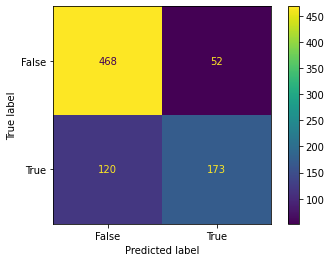

In [84]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()